In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [4]:
global a
global b

a = 0
b = 1

In [51]:
def f(x, n):
    midpoint = (b - a) / 2
    n_interval = (b - a) / n
    if 0 <= x <= midpoint:
        return 1
    if midpoint < x <= (midpoint + n_interval):
        return 1 - (n/(b - a)) * (x - midpoint)
    return 0

def f_limit(x):
    midpoint = (b - a)/2
    if 0 <= x <= midpoint:
        return 1
    return 0

def integrand(x, n):
    return f(x, n) - f_limit(x)

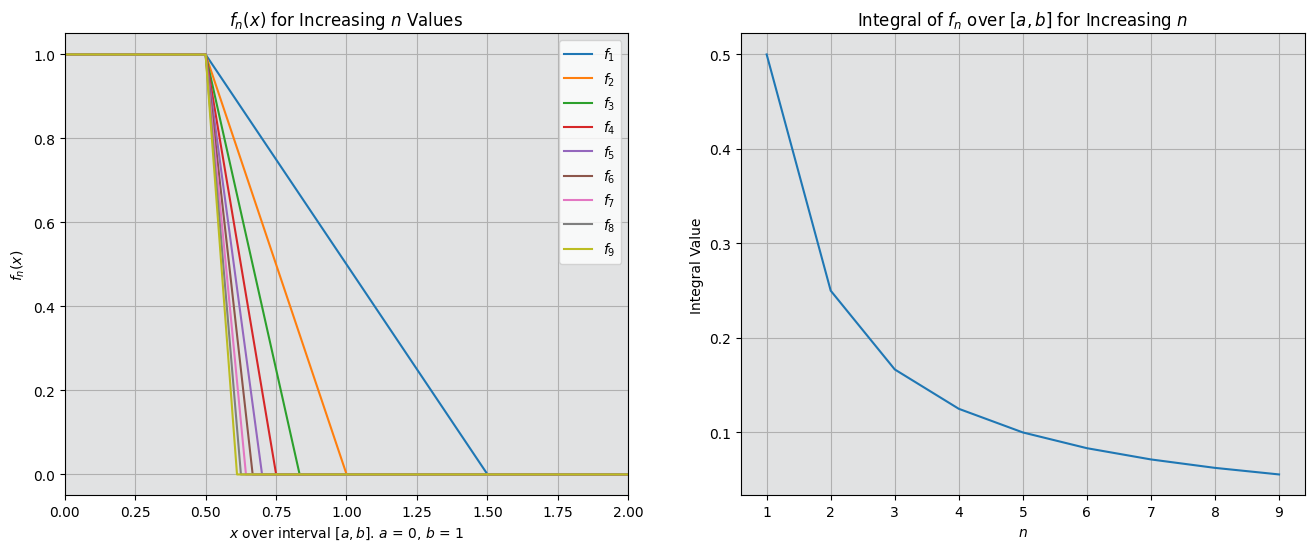

In [65]:
span = np.linspace(a, b + 1, int(1e6))
fig, axs = plt.subplots(1, 2, figsize = (16, 6))
int_vals = []

vals = 1
size = 10 * vals
for n in range(1, size, vals):
    f_n = [f(x, n) for x in span]
    axs[0].plot(span, f_n, label = fr'$f_{n}$')
    int_vals.append(quad(integrand, a, b + 1, args=(n))[0])

axs[0].set_facecolor("#e1e2e3")
axs[0].set_xlim(0, 2)
axs[0].legend()
axs[0].set_title(rf'$f_n(x)$ for Increasing $n$ Values')
axs[0].set_xlabel(rf'$x$ over interval $[a, b]$. $a$ = {a}, $b$ = {b}')
axs[0].set_ylabel(rf'$f_n(x)$')
axs[0].grid(True)

axs[1].plot(np.arange(1, size), int_vals)
axs[1].set_facecolor("#e1e2e3")
axs[1].set_title(rf'Integral of $f_n$ over $[a, b]$ for Increasing $n$')
axs[1].set_xlabel(r'$n$')
axs[1].set_ylabel("Integral Value")
axs[1].grid(True)
plt.show()
